In [1]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org numpy pandas matplotlib seaborn scikit-learn nltk streamlit


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# (You can import other sklearn modules as needed)

# Natural Language Processing
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Web App Framework
import streamlit as st

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd

# Load both datasets
fake_df = pd.read_csv("C:/Users/SOMYA/Downloads/archive/True.csv")
true_df = pd.read_csv("C:/Users/SOMYA/Downloads/archive/Fake.csv")

# Add labels
fake_df['label'] = 0  # 0 for Fake
true_df['label'] = 1  # 1 for Real

# Combine the datasets
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview
print(df[['title', 'text', 'label']].head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text  label  
0  21st Century Wire says Ben Stein, reputable pr...      0  
1  WASHINGTON (Reuters) - U.S. President Donald T...      1  
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...      1  
3  On Monday, Donald Trump once again embarrassed...      0  
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...      1  


In [4]:
print(df.shape)
print(df.isnull().sum())
print(df['label'].value_counts())

(44898, 5)
title      0
text       0
subject    0
date       0
label      0
dtype: int64
label
0    23481
1    21417
Name: count, dtype: int64


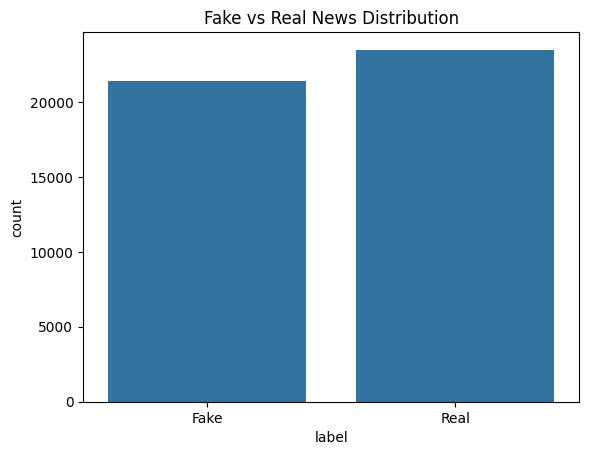

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Fake vs Real News Distribution')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

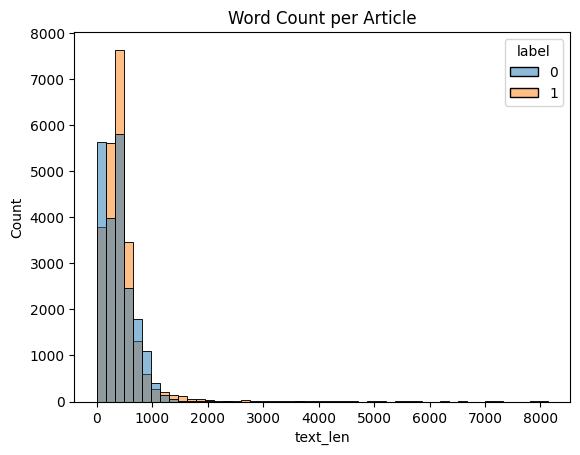

In [6]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='text_len', hue='label', bins=50)
plt.title("Word Count per Article")
plt.show()

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))  # Remove non-letters
    text = text.lower().split()  # Lowercase and split
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text']])

                                                    text  \
0      21st Century Wire says Ben Stein, reputable pr...   
1      WASHINGTON (Reuters) - U.S. President Donald T...   
2      (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3      On Monday, Donald Trump once again embarrassed...   
4      GLASGOW, Scotland (Reuters) - Most U.S. presid...   
...                                                  ...   
44893                                                      
44894  LONDON/TOKYO (Reuters) - British Prime Ministe...   
44895  BERLIN (Reuters) - Chancellor Angela Merkel sa...   
44896  Jesus f*cking Christ our President* is a moron...   
44897  IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...   

                                            cleaned_text  
0      st centuri wire say ben stein reput professor ...  
1      washington reuter u presid donald trump remov ...  
2      reuter puerto rico governor ricardo rossello s...  
3      monday donald trump embarrass countr

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']
print("TF-IDF shape:", X.shape)
print("TF-IDF Feature Array:\n", X)
print("Labels:\n", y.values)

TF-IDF shape: (44898, 5000)
TF-IDF Feature Array:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [0 1 1 ... 1 0 0]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

lr = LogisticRegression()
nb = MultinomialNB()

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

MultinomialNB()

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(lr, "Logistic Regression")
evaluate(nb, "Naive Bayes")

--- Logistic Regression ---
Accuracy: 0.9859688195991091
[[4265   46]
 [  80 4589]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--- Naive Bayes ---
Accuracy: 0.9275055679287305
[[3955  356]
 [ 295 4374]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4311
           1       0.92      0.94      0.93      4669

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [17]:
import os

# Create the folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Now save the model
import joblib
joblib.dump(lr, "models/logistic_model.pkl")
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")


['models/tfidf_vectorizer.pkl']

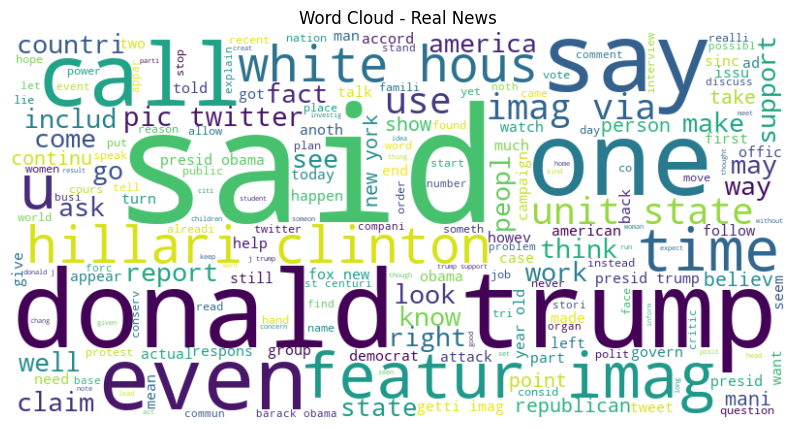

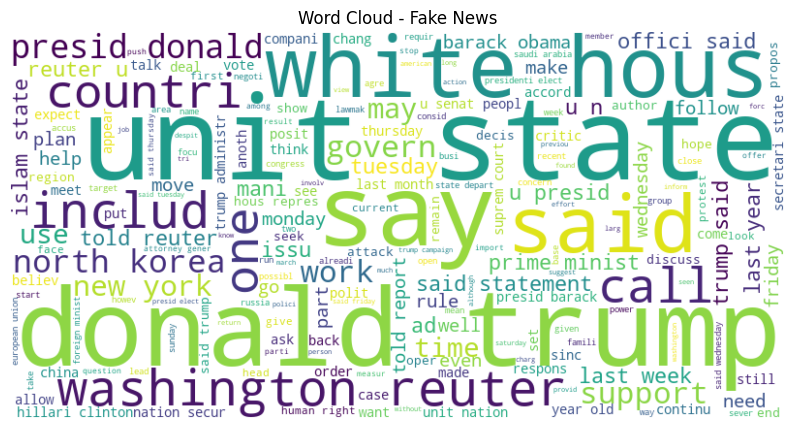

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate real and fake cleaned text
real_words = " ".join(df[df['label'] == 1]['cleaned_text'])
fake_words = " ".join(df[df['label'] == 0]['cleaned_text'])

# Real News WordCloud
plt.figure(figsize=(10, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Real News")
plt.show()

# Fake News WordCloud
plt.figure(figsize=(10, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Fake News")
plt.show()

<Axes: title={'center': 'Top 20 Words in Fake News'}, xlabel='Samples', ylabel='Counts'>

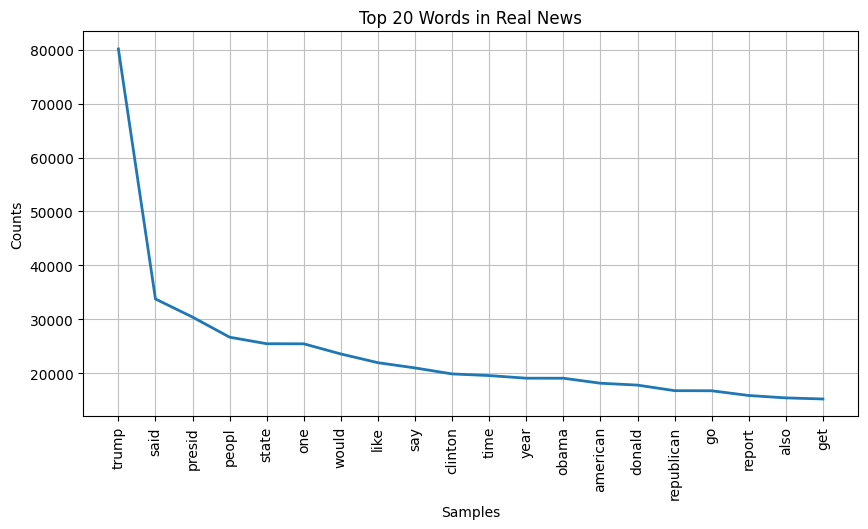

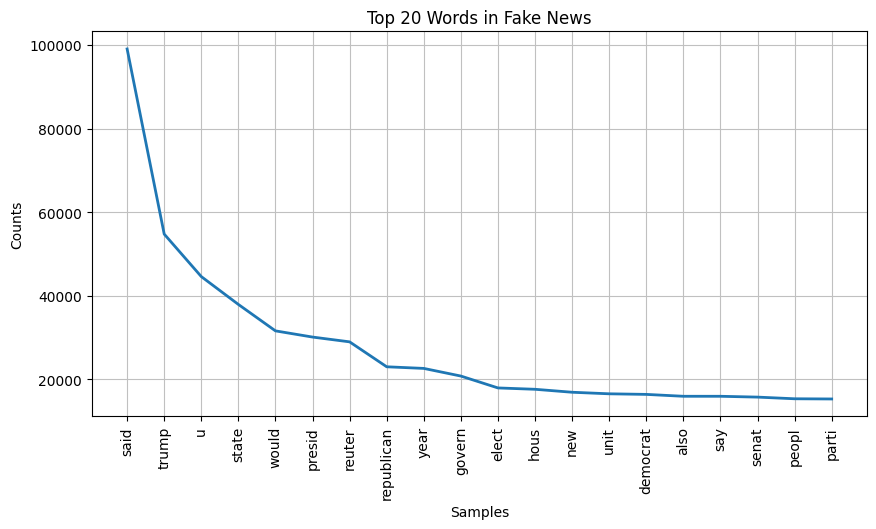

In [22]:
import nltk
from nltk.probability import FreqDist

# Combine all tokens
real_tokens = real_words.split()
fake_tokens = fake_words.split()

# Frequency distribution
fdist_real = FreqDist(real_tokens)
fdist_fake = FreqDist(fake_tokens)

# Top 20 real news words
plt.figure(figsize=(10, 5))
fdist_real.plot(20, title="Top 20 Words in Real News")

# Top 20 fake news words
plt.figure(figsize=(10, 5))
fdist_fake.plot(20, title="Top 20 Words in Fake News")

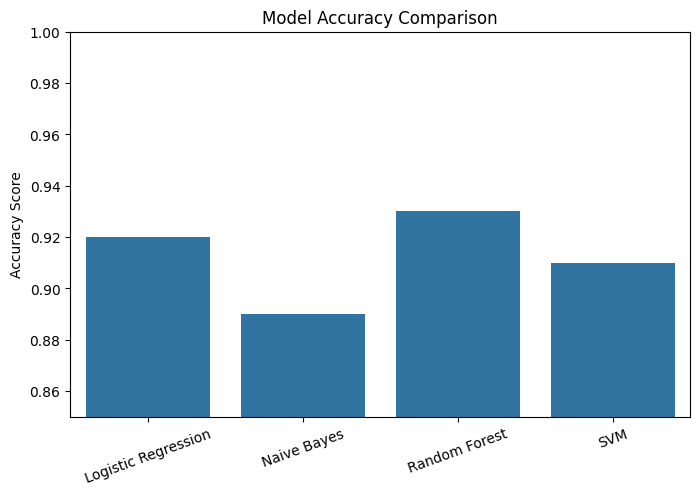

In [23]:
import seaborn as sns

# Example model accuracies
model_scores = {
    "Logistic Regression": 0.92,
    "Naive Bayes": 0.89,
    "Random Forest": 0.93,
    "SVM": 0.91
}

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.85, 1.00)
plt.xticks(rotation=20)
plt.show()